In [1]:
# Imports
import numpy as np
import time
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.backend import clear_session
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from scipy.stats import randint as sp_randint
from keras.layers import LeakyReLU
from sklearn.metrics import make_scorer, cohen_kappa_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from collections import defaultdict
from sklearn.preprocessing import StandardScaler

from utility3 import load_data, plot_learning_curves, report, plot_lines1

Using TensorFlow backend.


funky chicken goes cluck cluck CLUCK!!!
clucka clucka!!!
coookoooocachoo!!!
holy moley!
bless you!!!


In [7]:
X_train, X_val, X_test, y_train, y_val, y_test, class_names = load_data('motions', scale=True, valset=True)

########## BEST FOUND PARAMETERS from HW1 #####
n1 = 75
n2 = 14
mid_act = 'relu' #useleakyrelu is enabled...
num_layers = 3
optimizer = 'adam'
activation = 'sigmoid' 
epo = 100 #10
bat = 44 #18
##############################################

motions shapes: (11678, 64), (11678, 1)


In [6]:
# Extract pseudo-DR Data

pca_m_data = np.load('pca_m_data.npy')
pca2_m_data = np.load('pca2_m_data.npy')
ica_m_data = np.load('ica_m_data.npy')
rca_m_data = np.load('rca_m_data.npy')
tsne_m_data = np.load('ica_m_tsne_X.npy')  #np.load('X_tsne_m_set.npy')


[pca_y2_val_gm, pca2_y2_val_gm, ica_y2_val_gm, rca_y2_val_gm] = np.load('motions_val_em.npy')
[pca_y2_m, pca2_y2_m, ica_y2_m, rca_y2_m, tsne_y2_m, base_y2_m] = np.load('motions_em.npy')

[X_pca_m, X_val_pca_m, pca_m] = pca_m_data
[X_pca2_m, X_val_pca2_m, pca2_m] = pca2_m_data
[X_ica_m, X_val_ica_m, ica_m] = ica_m_data
[X_rca_m, X_val_rca_m, rca_m] = rca_m_data
X_tsne_m = tsne_m_data

#Scale it
scaler_ica = StandardScaler()
X_ica_m_scaled = scaler_ica.fit_transform(X_ica_m)
X_val_ica_m_scaled = scaler_ica.transform(X_val_ica_m)
scaler_tsne = StandardScaler()
X_tsne_m_scaled = scaler_tsne.fit_transform(X_tsne_m)


# KMeans Cluster
#km_model = KMeans(n_clusters=26)
#em_model = GaussianMixture(n_components=11)

In [13]:
# KM (PCA)
km_fit_pca = KMeans(n_clusters=26)

X_train_km_pca = km_fit_pca.fit_transform(X_pca_m)
X_val_km_pca = km_fit_pca.transform(X_val_pca_m)

km_pca_model = finalModel(X_train_km_pca, y_train, X_val_km_pca, y_val, learning_curves=False)

Fit time = 20.705000162124634
Pred time = 20.736200094223022
rock accuracy =   0.8061
paper accuracy =   0.6646
scissors accuracy =   0.7354
okay accuracy =   0.5680
Cohen Kappa: 0.5916542337300414
Accuracy: 0.6939539860888175
F1 Score: 0.6945386350829506
Precision: 0.6978212156244401
Recall: 0.6939539860888175


time elapsed: 20.98580026626587


In [14]:
# KM (PCA Full)
km_fit_pca2 = KMeans(n_clusters=26)

X_train_km_pca2 = km_fit_pca2.fit_transform(X_pca2_m)
X_val_km_pca2 = km_fit_pca2.transform(X_val_pca2_m)

km_pca2_model = finalModel(X_train_km_pca2, y_train, X_val_km_pca2, y_val, learning_curves=False)

Fit time = 24.20959997177124
Pred time = 24.256400108337402
rock accuracy =   0.8083
paper accuracy =   0.6646
scissors accuracy =   0.7750
okay accuracy =   0.5044
Cohen Kappa: 0.5850551864232686
Accuracy: 0.6891385767790262
F1 Score: 0.6908626465688907
Precision: 0.6998092643506092
Recall: 0.6891385767790262


time elapsed: 24.490400075912476


In [15]:
# KM (ICA )
km_fit_ica = KMeans(n_clusters=26)

X_train_km_ica = km_fit_ica.fit_transform(X_ica_m)
X_val_km_ica = km_fit_ica.transform(X_val_ica_m)

km_ica_model = finalModel(X_train_km_ica, y_train, X_val_km_ica, y_val, learning_curves=False)

Fit time = 23.370800018310547
Pred time = 23.41760015487671
rock accuracy =   0.0022
paper accuracy =   0.8122
scissors accuracy =   0.8396
okay accuracy =   0.0000
Cohen Kappa: 0.2239822292345699
Accuracy: 0.42215088282504015
F1 Score: 0.5574375228245514
Precision: 0.8267859487120964
Recall: 0.42215088282504015


time elapsed: 23.636000156402588


C:\Users\eking\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\eking\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [17]:
# KM (RCA )
km_fit_rca = KMeans(n_clusters=26)

X_train_km_rca = km_fit_rca.fit_transform(X_rca_m)
X_val_km_rca = km_fit_rca.transform(X_val_rca_m)

km_rca_model = finalModel(X_train_km_rca, y_train, X_val_km_rca, y_val, learning_curves=False)

Fit time = 22.354000091552734
Pred time = 22.400799989700317
rock accuracy =   0.7800
paper accuracy =   0.6772
scissors accuracy =   0.4854
okay accuracy =   0.3004
Cohen Kappa: 0.4145293806865521
Accuracy: 0.5612627073301231
F1 Score: 0.5732763283752674
Precision: 0.6057403116625101
Recall: 0.5612627073301231


time elapsed: 22.63479995727539


In [20]:
# KM (TSNE)
km_fit_tsne = KMeans(n_clusters=26)

X_train_km_tsne = km_fit_tsne.fit_transform(X_tsne_m_scaled)
#X_val_km_tsne = km_fit_tsne.transform(X_val_tsne_m)

km_tsne_model = finalModel(X_train_km_tsne, y_train, X_train_km_tsne, y_train, learning_curves=False)

Fit time = 21.72699999809265
Pred time = 21.83619999885559
rock accuracy =   0.8565


paper accuracy =   0.9055
scissors accuracy =   0.8072
okay accuracy =   0.7758
Cohen Kappa: 0.7817788776367282
Accuracy: 0.8363441723538071
F1 Score: 0.8365735269510416
Precision: 0.8383195744070557


Recall: 0.8363441723538071


time elapsed: 22.367600202560425


In [22]:
# EM (TSNE)
result = []
for param in range(1, 64):
    em_fit_tsne = GaussianMixture(n_components=param)
    
    em_fit_tsne.fit(X_tsne_m)
    X_train_em_tsne = em_fit_tsne.predict_proba(X_tsne_m)
    #X_val_km_tsne = km_fit_tsne.transform(X_val_tsne_m)
    
    em_tsne_model = finalModel(X_train_em_tsne, y_train, X_train_em_tsne, y_train, learning_curves=False)
    result.append(em_tsne_model)

Fit time = 21.720600366592407
Pred time = 21.89520025253296


rock accuracy =   1.0000
paper accuracy =   0.0000
scissors accuracy =   0.0000
okay accuracy =   0.0000
Cohen Kappa: 0.0
Accuracy: 0.2507694366385655
F1 Score: 0.40098427302877926
Precision: 1.0


C:\Users\eking\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\eking\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Recall: 0.2507694366385655
time elapsed: 22.33300018310547


Fit time = 17.897600173950195
Pred time = 18.024399995803833
rock accuracy =   0.7850


paper accuracy =   0.8116
scissors accuracy =   0.3963
okay accuracy =   0.3316
Cohen Kappa: 0.44209614968788524
Accuracy: 0.5816940987555199
F1 Score: 0.6021908128602945
Precision: 0.653596843366605
Recall: 0.5816940987555199


time elapsed: 18.445600032806396


Fit time = 18.288999795913696
Pred time = 18.41379976272583
rock accuracy =   0.8554


paper accuracy =   0.9370
scissors accuracy =   0.7678
okay accuracy =   0.7277
Cohen Kappa: 0.7628532490441354
Accuracy: 0.8221597751906865
F1 Score: 0.8233234194402865


Precision: 0.8306031549459763
Recall: 0.8221597751906865


time elapsed: 18.928600072860718


Fit time = 17.707800149917603
Pred time = 17.816999912261963
rock accuracy =   0.8703


paper accuracy =   0.9408
scissors accuracy =   0.7765
okay accuracy =   0.7165
Cohen Kappa: 0.7682102788285963
Accuracy: 0.8261742272179847
F1 Score: 0.8280130941972376
Precision: 0.835522322160759
Recall: 0.8261742272179847


time elapsed: 18.239200115203857


Fit time = 17.224000215530396
Pred time = 17.31760001182556
rock accuracy =   0.8442
paper accuracy =   0.9418


scissors accuracy =   0.7770
okay accuracy =   0.7560
Cohen Kappa: 0.773206185750154
Accuracy: 0.8299210491101298
F1 Score: 0.830748632182719
Precision: 0.8365970677982948
Recall: 0.8299210491101298

time elapsed: 17.848000049591064


Fit time = 17.26740002632141
Pred time = 17.392200231552124
rock accuracy =   0.8655


paper accuracy =   0.9386
scissors accuracy =   0.7846
okay accuracy =   0.7597
Cohen Kappa: 0.7830198074874237
Accuracy: 0.8372808778268434
F1 Score: 0.8382272301392061
Precision: 0.8431269893336671


Recall: 0.8372808778268434
time elapsed: 17.844600439071655


Fit time = 17.18500018119812
Pred time = 17.29419994354248
rock accuracy =   0.8634
paper accuracy =   0.9429


scissors accuracy =   0.8008
okay accuracy =   0.7341
Cohen Kappa: 0.780530463208537
Accuracy: 0.8354074668807707
F1 Score: 0.8368520157788542
Precision: 0.8426618628960388
Recall: 0.8354074668807707


time elapsed: 17.715400218963623


Fit time = 17.29260015487671
Pred time = 17.386200189590454
rock accuracy =   0.8607
paper accuracy =   0.9360


scissors accuracy =   0.8024
okay accuracy =   0.7405
Cohen Kappa: 0.7799942313666098
Accuracy: 0.8350060216780409
F1 Score: 0.8362583536105317
Precision: 0.841412037267068
Recall: 0.8350060216780409


time elapsed: 17.823000192642212


Fit time = 17.32260012626648
Pred time = 17.431800365447998
rock accuracy =   0.8543
paper accuracy =   0.9456


scissors accuracy =   0.7819
okay accuracy =   0.7603
Cohen Kappa: 0.7808782730536177
Accuracy: 0.835675097015924
F1 Score: 0.8367252163226755
Precision: 0.8424593373950023
Recall: 0.835675097015924


time elapsed: 17.837400197982788


Fit time = 17.34599995613098
Pred time = 17.470800161361694
rock accuracy =   0.8453


paper accuracy =   0.9493
scissors accuracy =   0.7932
okay accuracy =   0.7507
Cohen Kappa: 0.7796351905014501
Accuracy: 0.8347383915428878
F1 Score: 0.8357582344495073
Precision: 0.8419532469871887
Recall: 0.8347383915428878


time elapsed: 18.001199960708618


Fit time = 17.434800148010254
Pred time = 17.559600114822388
rock accuracy =   0.8629


paper accuracy =   0.9392
scissors accuracy =   0.7943
okay accuracy =   0.7549
Cohen Kappa: 0.7839145239892692
Accuracy: 0.8379499531647263
F1 Score: 0.8390348410071183
Precision: 0.84398715661829
Recall: 0.8379499531647263


time elapsed: 17.98080015182495


Fit time = 17.471999883651733
Pred time = 17.56559991836548
rock accuracy =   0.8613
paper accuracy =   0.9354


scissors accuracy =   0.7921
okay accuracy =   0.7645
Cohen Kappa: 0.7846288370888275
Accuracy: 0.8384852134350328
F1 Score: 0.8393155013796818
Precision: 0.8434390033140807
Recall: 0.8384852134350328


time elapsed: 17.98680019378662


Fit time = 17.663600206375122
Pred time = 17.77280044555664
rock accuracy =   0.8559
paper accuracy =   0.9376


scissors accuracy =   0.8018
okay accuracy =   0.7475
Cohen Kappa: 0.7810638519622692
Accuracy: 0.8358089120835006
F1 Score: 0.8368073888196887
Precision: 0.8418607371358933
Recall: 0.8358089120835006


time elapsed: 18.194000244140625


Fit time = 19.07760000228882
Pred time = 19.186800003051758
rock accuracy =   0.8661
paper accuracy =   0.9370


scissors accuracy =   0.7975
okay accuracy =   0.7581
Cohen Kappa: 0.7864131217672955
Accuracy: 0.8398233641107988
F1 Score: 0.8407937787005553
Precision: 0.845368089367909
Recall: 0.8398233641107988


time elapsed: 19.630600214004517


Fit time = 23.151600122451782
Pred time = 23.26080012321472
rock accuracy =   0.8511


paper accuracy =   0.9445
scissors accuracy =   0.7792
okay accuracy =   0.7597
Cohen Kappa: 0.778379983862976
Accuracy: 0.8338016860698515
F1 Score: 0.8347818409571489
Precision: 0.8405123421608447
Recall: 0.8338016860698515

time elapsed: 23.855600118637085


Fit time = 19.564000129699707
Pred time = 19.657600164413452
rock accuracy =   0.8383
paper accuracy =   0.9472


scissors accuracy =   0.8013
okay accuracy =   0.7720
Cohen Kappa: 0.7864145497243012
Accuracy: 0.8398233641107988
F1 Score: 0.8403521946904904
Precision: 0.8457140902357956
Recall: 0.8398233641107988


time elapsed: 20.078799962997437


Fit time = 20.44860005378723
Pred time = 20.573400020599365
rock accuracy =   0.7919


paper accuracy =   0.9408
scissors accuracy =   0.7819
okay accuracy =   0.8137
Cohen Kappa: 0.7762370232692299
Accuracy: 0.8321959052589322
F1 Score: 0.8318386536545823


Precision: 0.839128176733412
Recall: 0.8321959052589322


time elapsed: 21.166200160980225


Fit time = 21.441200017929077
Pred time = 21.550400257110596
rock accuracy =   0.8645


paper accuracy =   0.9525
scissors accuracy =   0.7835
okay accuracy =   0.7608
Cohen Kappa: 0.7873005032471847
Accuracy: 0.8404924394486819
F1 Score: 0.8415909750051511
Precision: 0.8480708336091476
Recall: 0.8404924394486819


time elapsed: 21.988200187683105


Fit time = 18.83240008354187
Pred time = 18.988399982452393
rock accuracy =   0.8613


paper accuracy =   0.9424
scissors accuracy =   0.7900
okay accuracy =   0.7539
Cohen Kappa: 0.7826657655996785
Accuracy: 0.83701324769169
F1 Score: 0.8380057518563966


Precision: 0.8433361191713618
Recall: 0.83701324769169


time elapsed: 19.549999952316284


Fit time = 19.33400011062622
Pred time = 19.521199941635132


rock accuracy =   0.8607
paper accuracy =   0.9381
scissors accuracy =   0.8083
okay accuracy =   0.7485


Cohen Kappa: 0.7853486355794844
Accuracy: 0.8390204737053393
F1 Score: 0.8400364968349968
Precision: 0.8448486724969712
Recall: 0.8390204737053393


time elapsed: 20.162800073623657


Fit time = 20.443600177764893


Pred time = 20.677600145339966
rock accuracy =   0.8517
paper accuracy =   0.9461
scissors accuracy =   0.7959
okay accuracy =   0.7640


Cohen Kappa: 0.7860571965112727
Accuracy: 0.8395557339756456
F1 Score: 0.8403867185262109
Precision: 0.8453863433988159
Recall: 0.8395557339756456


time elapsed: 21.192400217056274


Fit time = 22.678800106048584
Pred time = 22.801000118255615
rock accuracy =   0.8581


paper accuracy =   0.9413
scissors accuracy =   0.8040
okay accuracy =   0.7587
Cohen Kappa: 0.7874868482708602
Accuracy: 0.8406262545162585
F1 Score: 0.841446336788993


Precision: 0.8463529034422124
Recall: 0.8406262545162585


time elapsed: 23.342400074005127


Fit time = 22.30240035057068
Pred time = 22.442800283432007


rock accuracy =   0.8821
paper accuracy =   0.9386
scissors accuracy =   0.7867
okay accuracy =   0.7464
Cohen Kappa: 0.7848016919323755
Accuracy: 0.8386190285026094


F1 Score: 0.8400449130705082
Precision: 0.8458160125473534
Recall: 0.8386190285026094


time elapsed: 23.08240032196045


Fit time = 19.292200326919556
Pred time = 19.401400327682495
rock accuracy =   0.8586


paper accuracy =   0.9328
scissors accuracy =   0.7905
okay accuracy =   0.7715
Cohen Kappa: 0.78462683664441
Accuracy: 0.8384852134350328
F1 Score: 0.8391337349646558
Precision: 0.8431371338319138
Recall: 0.8384852134350328


time elapsed: 19.858800172805786


Fit time = 20.544399976730347
Pred time = 20.653600215911865
rock accuracy =   0.8666


paper accuracy =   0.9434
scissors accuracy =   0.7954
okay accuracy =   0.7555
Cohen Kappa: 0.7871262066914367
Accuracy: 0.8403586243811053
F1 Score: 0.8414530780135845


Precision: 0.8468351340906565
Recall: 0.8403586243811053


time elapsed: 21.215200185775757


Fit time = 18.71679997444153
Pred time = 18.841599941253662


rock accuracy =   0.8741
paper accuracy =   0.9461
scissors accuracy =   0.7910
okay accuracy =   0.7517


Cohen Kappa: 0.7878369606219593
Accuracy: 0.8408938846514118
F1 Score: 0.8422000977813721
Precision: 0.848218501364401
Recall: 0.8408938846514118


time elapsed: 19.450999975204468


Fit time = 20.437599897384644
Pred time = 20.57800006866455
rock accuracy =   0.8618


paper accuracy =   0.9424
scissors accuracy =   0.7927
okay accuracy =   0.7726
Cohen Kappa: 0.7899793124493496


Accuracy: 0.842499665462331
F1 Score: 0.843230033079289
Precision: 0.847938022522359
Recall: 0.842499665462331


time elapsed: 21.264400005340576


Fit time = 24.816200017929077
Pred time = 24.925400257110596
rock accuracy =   0.8602


paper accuracy =   0.9477
scissors accuracy =   0.8121
okay accuracy =   0.7523
Cohen Kappa: 0.7908805866375309
Accuracy: 0.8431687408002141
F1 Score: 0.8442224920479077
Precision: 0.8495672367231052


Recall: 0.8431687408002141


time elapsed: 25.433000087738037


Fit time = 24.730400323867798
Pred time = 24.85520029067993
rock accuracy =   0.8602


paper accuracy =   0.9445
scissors accuracy =   0.8062
okay accuracy =   0.7485
Cohen Kappa: 0.7865968409474684
Accuracy: 0.8399571791783755
F1 Score: 0.841149160255484


Precision: 0.8461965950491414
Recall: 0.8399571791783755


time elapsed: 25.448000192642212


Fit time = 20.364399909973145
Pred time = 20.489200115203857
rock accuracy =   0.8533
paper accuracy =   0.9408


scissors accuracy =   0.8013
okay accuracy =   0.7699
Cohen Kappa: 0.788556413573059
Accuracy: 0.8414291449217182
F1 Score: 0.8420674878205481
Precision: 0.8466152364675441
Recall: 0.8414291449217182


time elapsed: 21.035199880599976


Fit time = 19.643400192260742
Pred time = 19.768200397491455


rock accuracy =   0.8666
paper accuracy =   0.9477
scissors accuracy =   0.8002
okay accuracy =   0.7544
Cohen Kappa: 0.7898034448839673


Accuracy: 0.8423658503947544
F1 Score: 0.843497190705323
Precision: 0.8492259751781964
Recall: 0.8423658503947544


time elapsed: 20.439000368118286


Fit time = 26.30139994621277
Pred time = 26.426199913024902
rock accuracy =   0.8661


paper accuracy =   0.9445
scissors accuracy =   0.7997
okay accuracy =   0.7507
Cohen Kappa: 0.7871279043563608
Accuracy: 0.8403586243811053


F1 Score: 0.8415143162947316
Precision: 0.8470673311152771
Recall: 0.8403586243811053


time elapsed: 27.051199913024902


Fit time = 25.147000074386597
Pred time = 25.287400007247925


rock accuracy =   0.8597
paper accuracy =   0.9408
scissors accuracy =   0.8008
okay accuracy =   0.7678


Cohen Kappa: 0.7898041324747751
Accuracy: 0.8423658503947544
F1 Score: 0.8431959617912334
Precision: 0.8477264203814536
Recall: 0.8423658503947544


time elapsed: 25.989399909973145


Fit time = 25.065200328826904
Pred time = 25.221199989318848


rock accuracy =   0.8415
paper accuracy =   0.9456
scissors accuracy =   0.8045
okay accuracy =   0.7694
Cohen Kappa: 0.7871309895643127
Accuracy: 0.8403586243811053


F1 Score: 0.8409894910373704
Precision: 0.8458672917333818
Recall: 0.8403586243811053


time elapsed: 25.856200218200684


Fit time = 24.835400104522705
Pred time = 25.006999969482422


rock accuracy =   0.8709
paper accuracy =   0.9424
scissors accuracy =   0.7986
okay accuracy =   0.7565


Cohen Kappa: 0.7896248791747884
Accuracy: 0.8422320353271778
F1 Score: 0.8433179459136428
Precision: 0.8482807800159936
Recall: 0.8422320353271778


time elapsed: 25.616400003433228


Fit time = 23.250200033187866
Pred time = 23.359400272369385
rock accuracy =   0.8623


paper accuracy =   0.9461
scissors accuracy =   0.7954
okay accuracy =   0.7635
Cohen Kappa: 0.7892676011710893
Accuracy: 0.8419644051920246
F1 Score: 0.8428747611312118


Precision: 0.8480060671895745
Recall: 0.8419644051920246


time elapsed: 23.874200105667114


Fit time = 22.949400186538696
Pred time = 23.071600198745728
rock accuracy =   0.8543


paper accuracy =   0.9466
scissors accuracy =   0.8105
okay accuracy =   0.7581
Cohen Kappa: 0.7899872505610606
Accuracy: 0.842499665462331
F1 Score: 0.8434251352962427


Precision: 0.8485133834343709
Recall: 0.842499665462331


time elapsed: 23.63320016860962


Fit time = 18.663000345230103
Pred time = 18.756600379943848
rock accuracy =   0.8773
paper accuracy =   0.9434


scissors accuracy =   0.7829
okay accuracy =   0.7779
Cohen Kappa: 0.7940794660562291
Accuracy: 0.8455774120165931
F1 Score: 0.8464593916146818
Precision: 0.8515244198768531
Recall: 0.8455774120165931


time elapsed: 19.24120020866394


Fit time = 21.369800090789795
Pred time = 21.479000091552734
rock accuracy =   0.8890


paper accuracy =   0.9413
scissors accuracy =   0.7991
okay accuracy =   0.7304
Cohen Kappa: 0.7867705266648497
Accuracy: 0.8400909942459521
F1 Score: 0.8418721939480661


Precision: 0.8484091822131964
Recall: 0.8400909942459521


time elapsed: 22.105000019073486


Fit time = 21.78920006752014
Pred time = 21.89840030670166
rock accuracy =   0.8340
paper accuracy =   0.9445


scissors accuracy =   0.7991
okay accuracy =   0.7950
Cohen Kappa: 0.7910534185965852
Accuracy: 0.8433025558677907
F1 Score: 0.8434889689901496
Precision: 0.84824526340821
Recall: 0.8433025558677907

time elapsed: 22.36740016937256


Fit time = 19.392399787902832
Pred time = 19.50160002708435
rock accuracy =   0.8735
paper accuracy =   0.9386


scissors accuracy =   0.7916
okay accuracy =   0.7656
Cohen Kappa: 0.7899787056580686
Accuracy: 0.842499665462331
F1 Score: 0.8435231086177609
Precision: 0.8480225224381119
Recall: 0.842499665462331


time elapsed: 19.93840003013611


Fit time = 19.34980010986328
Pred time = 19.45900011062622
rock accuracy =   0.8821


paper accuracy =   0.9456
scissors accuracy =   0.7873
okay accuracy =   0.7528
Cohen Kappa: 0.7894406220042088
Accuracy: 0.8420982202596012
F1 Score: 0.8434184500800658
Precision: 0.8495536800753958
Recall: 0.8420982202596012


time elapsed: 19.917400121688843


Fit time = 19.302800178527832
Pred time = 19.396400213241577
rock accuracy =   0.8783
paper accuracy =   0.9498


scissors accuracy =   0.7970
okay accuracy =   0.7363
Cohen Kappa: 0.7873050943893731
Accuracy: 0.8404924394486819
F1 Score: 0.8420843436364288
Precision: 0.8487939507167239
Recall: 0.8404924394486819


time elapsed: 19.864400148391724


Fit time = 18.719200134277344
Pred time = 18.829400062561035
rock accuracy =   0.8661
paper accuracy =   0.9504


scissors accuracy =   0.7959
okay accuracy =   0.7662
Cohen Kappa: 0.7930127315121299
Accuracy: 0.8447745216111334
F1 Score: 0.8456724481544705
Precision: 0.8515363622495354


Recall: 0.8447745216111334


time elapsed: 19.344199895858765


Fit time = 18.688600063323975
Pred time = 18.813400268554688
rock accuracy =   0.8581


paper accuracy =   0.9360
scissors accuracy =   0.7856
okay accuracy =   0.7864
Cohen Kappa: 0.7889066927246946
Accuracy: 0.8416967750568713
F1 Score: 0.8421358547678337
Precision: 0.8462199678395832
Recall: 0.8416967750568713


time elapsed: 19.34380006790161

Fit time = 18.585999965667725
Pred time = 18.695200204849243
rock accuracy =   0.8863
paper accuracy =   0.9322


scissors accuracy =   0.7954
okay accuracy =   0.7549
Cohen Kappa: 0.7898006392660897
Accuracy: 0.8423658503947544
F1 Score: 0.8435803853592838


Precision: 0.8480973694388177
Recall: 0.8423658503947544
time elapsed: 19.176599979400635

Fit time = 18.67900037765503
Pred time = 18.772600412368774
rock accuracy =   0.8442
paper accuracy =   0.9477


scissors accuracy =   0.8002
okay accuracy =   0.7800
Cohen Kappa: 0.7908749842828333
Accuracy: 0.8431687408002141
F1 Score: 0.8437204473581684
Precision: 0.8487023810131727
Recall: 0.8431687408002141


time elapsed: 19.210400342941284


Fit time = 19.28920030593872
Pred time = 19.414000272750854
rock accuracy =   0.8906


paper accuracy =   0.9376
scissors accuracy =   0.7851
okay accuracy =   0.7571
Cohen Kappa: 0.7903321018301962
Accuracy: 0.8427672955974843
F1 Score: 0.8441121684987015
Precision: 0.8494850034609486


Recall: 0.8427672955974843
time elapsed: 19.91320013999939


Fit time = 18.59000015258789
Pred time = 18.714800119400024
rock accuracy =   0.8661


paper accuracy =   0.9488
scissors accuracy =   0.8072
okay accuracy =   0.7459
Cohen Kappa: 0.789450616662563
Accuracy: 0.8420982202596012
F1 Score: 0.8434007090903586
Precision: 0.8491846904433991


Recall: 0.8420982202596012


time elapsed: 19.18280005455017


Fit time = 18.948800086975098
Pred time = 19.058000087738037
rock accuracy =   0.8874


paper accuracy =   0.9493
scissors accuracy =   0.8062
okay accuracy =   0.7330
Cohen Kappa: 0.792124054260069
Accuracy: 0.8441054462732503
F1 Score: 0.8457843005337548
Precision: 0.8530480966755757
Recall: 0.8441054462732503


time elapsed: 19.51040005683899


Fit time = 19.5594003200531
Pred time = 19.66860008239746
rock accuracy =   0.8404
paper accuracy =   0.9498


scissors accuracy =   0.7948
okay accuracy =   0.7816
Cohen Kappa: 0.7890876296192296
Accuracy: 0.841830590124448
F1 Score: 0.842343236801036
Precision: 0.8478810192411788
Recall: 0.841830590124448


time elapsed: 20.136600017547607


Fit time = 24.602400302886963
Pred time = 24.742799997329712


rock accuracy =   0.8831
paper accuracy =   0.9429
scissors accuracy =   0.7948
okay accuracy =   0.7533
Cohen Kappa: 0.7915841681442399
Accuracy: 0.8437040010705206
F1 Score: 0.8450022350450853
Precision: 0.850546577199074
Recall: 0.8437040010705206


time elapsed: 25.429200172424316


Fit time = 24.149400234222412
Pred time = 24.274200201034546


rock accuracy =   0.8735
paper accuracy =   0.9525
scissors accuracy =   0.7943
okay accuracy =   0.7405


Cohen Kappa: 0.7871243615937615
Accuracy: 0.8403586243811053
F1 Score: 0.8418395159938388
Precision: 0.8490103717630741
Recall: 0.8403586243811053


time elapsed: 24.898200035095215


Fit time = 21.617600202560425
Pred time = 21.726800203323364
rock accuracy =   0.8677


paper accuracy =   0.9450
scissors accuracy =   0.7970
okay accuracy =   0.7656
Cohen Kappa: 0.7919431211609633
Accuracy: 0.8439716312056738
F1 Score: 0.8448899305524588
Precision: 0.8499766795404725
Recall: 0.8439716312056738


time elapsed: 22.179200172424316


Fit time = 27.799800157546997
Pred time = 27.9060001373291
rock accuracy =   0.8490


paper accuracy =   0.9424
scissors accuracy =   0.7856
okay accuracy =   0.7934
Cohen Kappa: 0.7903331682014492
Accuracy: 0.8427672955974843
F1 Score: 0.8431589824527466
Precision: 0.8479416091528588
Recall: 0.8427672955974843


time elapsed: 28.375


Fit time = 25.017800331115723
Pred time = 25.142600297927856
rock accuracy =   0.8671


paper accuracy =   0.9408
scissors accuracy =   0.7932
okay accuracy =   0.7678
Cohen Kappa: 0.7898005388848136
Accuracy: 0.8423658503947544
F1 Score: 0.84330262432248
Precision: 0.8478700967718299


Recall: 0.8423658503947544


time elapsed: 25.75600004196167


Fit time = 23.789600133895874


Pred time = 24.023600101470947
rock accuracy =   0.8634
paper accuracy =   0.9450
scissors accuracy =   0.8067


okay accuracy =   0.7624
Cohen Kappa: 0.7926605007330856
Accuracy: 0.8445068914759802
F1 Score: 0.8454077090616856
Precision: 0.8502770215344314


Recall: 0.8445068914759802


time elapsed: 24.647600173950195


Fit time = 26.004200220108032
Pred time = 26.129000186920166
rock accuracy =   0.8436


paper accuracy =   0.9541
scissors accuracy =   0.7981
okay accuracy =   0.7731


Cohen Kappa: 0.7898027974403354
Accuracy: 0.8423658503947544
F1 Score: 0.8430636399916759
Precision: 0.8492017216640999
Recall: 0.8423658503947544


time elapsed: 26.721800327301025


Fit time = 24.565199851989746
Pred time = 24.705600023269653
rock accuracy =   0.8837


paper accuracy =   0.9525
scissors accuracy =   0.7910
okay accuracy =   0.7416
Cohen Kappa: 0.7897990532307183
Accuracy: 0.8423658503947544
F1 Score: 0.8439706498578333


Precision: 0.8510434310155628
Recall: 0.8423658503947544


time elapsed: 25.284800052642822


Fit time = 23.906200170516968


Pred time = 24.14020013809204
rock accuracy =   0.8725
paper accuracy =   0.9461


scissors accuracy =   0.7959
okay accuracy =   0.7555
Cohen Kappa: 0.7901594883760877
Accuracy: 0.8426334805299077
F1 Score: 0.8438490851315814
Precision: 0.8491016715266043


Recall: 0.8426334805299077


time elapsed: 24.87340021133423


Fit time = 24.058600187301636
Pred time = 24.19760012626648


rock accuracy =   0.8783
paper accuracy =   0.9456
scissors accuracy =   0.7997
okay accuracy =   0.7533
Cohen Kappa: 0.7924790696597159
Accuracy: 0.8443730764084035
F1 Score: 0.8456151908470733


Precision: 0.8510741455983619
Recall: 0.8443730764084035


time elapsed: 24.734800100326538


Fit time = 22.951600313186646
Pred time = 23.12320041656494


rock accuracy =   0.8709
paper accuracy =   0.9418
scissors accuracy =   0.7856
okay accuracy =   0.7790
Cohen Kappa: 0.7926524655027516
Accuracy: 0.8445068914759802


F1 Score: 0.8453067072264333
Precision: 0.8499275761975006
Recall: 0.8445068914759802


time elapsed: 23.706200122833252


Fit time = 26.437000036239624
Pred time = 26.577399969100952


rock accuracy =   0.8709
paper accuracy =   0.9472
scissors accuracy =   0.8029
okay accuracy =   0.7651


Cohen Kappa: 0.7955133878130625
Accuracy: 0.8466479325572059
F1 Score: 0.8476673501034379
Precision: 0.8525526134198569
Recall: 0.8466479325572059


time elapsed: 27.20580005645752


str

In [24]:
ica_tsne_em_results = result

# unpack my sloppy mess
cohen_kappas = []
accuracies = []
ok_score = []
rock_score = []
paper_score = []
scissors_score = []
fit_times = []
pred_times = []

for result in ica_tsne_em_results:
    cohen_kappas.append(result['cohen_kappa'])
    accuracies.append(result['accuracy'])
    ok_score.append(result['okay_accuracy'])
    rock_score.append(result['rock_accuracy'])
    paper_score.append(result['paper_accuracy'])
    scissors_score.append(result['scissors_accuracy'])
    fit_times.append(result['fit_time'])
    pred_times.append(result['pred_time'])
    
np.save('ica_tsne_em_results', [range(1, 64), cohen_kappas, accuracies, ok_score, rock_score, paper_score, scissors_score, fit_times, pred_times])

TypeError: string indices must be integers

In [ ]:
[param_range, cohen_kappas, accuracies, ok_score, rock_score, paper_score, scissors_score, fit_times, pred_times] = np.load('ica_tsne_em_results.npy')

plt.plot(param_range, cohen_kappas, label="cohen kappa", color='blue')
plt.plot(param_range, accuracies, label='total accuracy', color='green')
plt.xlabel('number of components')
plt.legend()
plt.show()

plt.plot(param_range, ok_score, label = 'okay', color="crimson")
plt.plot(param_range, rock_score, label = 'rock', color="gold")
plt.plot(param_range, paper_score, label = 'paper', color="green")
plt.plot(param_range, scissors_score, label = 'scissors', color="blue")
plt.xlabel('number of components')
plt.legend()
plt.show()

In [ ]:
# KM (TSNE)
result = []
for param in ['full', 'tied', 'spherical', 'diag']:
    em_fit_tsne = GaussianMixture(n_components=30, covariance_type='tied')
    
    em_fit_tsne.fit(X_tsne_m)
    X_train_em_tsne = em_fit_tsne.predict_proba(X_tsne_m)
    #X_val_km_tsne = km_fit_tsne.transform(X_val_tsne_m)
    
    em_tsne_model = finalModel(X_train_em_tsne, y_train, X_train_em_tsne, y_train, learning_curves=False)
    result.append(em_tsne_model)

In [ ]:
ica_tsne_em_results_tied = result

# unpack my sloppy mess
cohen_kappas = []
accuracies = []
ok_score = []
rock_score = []
paper_score = []
scissors_score = []
fit_times = []
pred_times = []

for result in ica_tsne_em_results_tied:
    cohen_kappas.append(result['cohen_kappa'])
    accuracies.append(result['accuracy'])
    ok_score.append(result['okay_accuracy'])
    rock_score.append(result['rock_accuracy'])
    paper_score.append(result['paper_accuracy'])
    scissors_score.append(result['scissors_accuracy'])
    fit_times.append(result['fit_time'])
    pred_times.append(result['pred_time'])
    
np.save('ica_tsne_em_results_tied', [param_range, cohen_kappas, accuracies, ok_score, rock_score, paper_score, scissors_score, fit_times, pred_times])

Fit time = 19.604999780654907
Pred time = 19.646999835968018
rock accuracy =   0.8867
paper accuracy =   0.5675
scissors accuracy =   0.5771
okay accuracy =   0.4846
Cohen Kappa: 0.5043346463768813
Accuracy: 0.628143392188336
F1 Score: 0.6359926077753543
Precision: 0.6556849644469583
Recall: 0.628143392188336

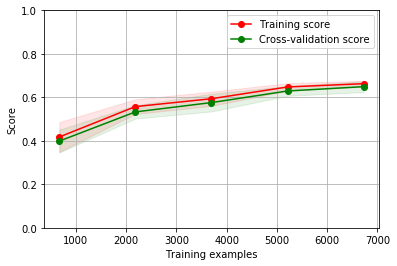

time elapsed: 866.949000120163


In [31]:

km_nn_model = finalModel(X_train_km, y_train, X_val_km, y_val, learning_curves=True)

In [89]:
# Extract pseudo DR Data for Gaussian Mixture / Expectation Maximization

X_train_gm = em_fit.predict_proba(X_train)
X_train_gm.shape
X_val_gm = em_fit.predict_proba(X_val)
X_test_gm = em_fit.predict_proba(X_test)

Fit time = 27.852784872055054
Pred time = 27.898789644241333
rock accuracy =   0.9782
paper accuracy =   0.9810
scissors accuracy =   0.9229
okay accuracy =   0.8158


Cohen Kappa: 0.9000819094642662
Accuracy: 0.9250936329588015
F1 Score: 0.9258495726267777
Precision: 0.9298847625236499
Recall: 0.9250936329588015


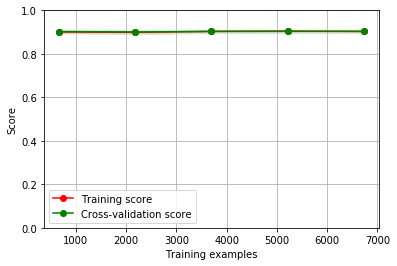

time elapsed: 969.3095459938049


In [33]:
em_nn_model = finalModel(X_train_gm, y_train, X_val_gm, y_val, learning_curves=True)

In [15]:
param_range = range(2, 64)

km_results = []
for param in param_range:
    km_model = KMeans(n_clusters=param)
    km_fit = km_model.fit(X_train)
    X_train_km = km_fit.transform(X_train)
    X_val_km = km_fit.transform(X_val)
    km_nn_model_results = finalModel(X_train_km, y_train, X_val_km, y_val, learning_curves=False)
    km_nn_model_results['param'] = param
    km_results.append(km_nn_model_results)
    print('finished param {}'.format(param))

Cohen Kappa: 0.3054267677985446
time elapsed: 29.087599754333496
finished param 2


Cohen Kappa: 0.31579943952132095
time elapsed: 26.14300012588501
finished param 3


Cohen Kappa: 0.3568735029269716
time elapsed: 22.213800191879272
finished param 4


Cohen Kappa: 0.4166319433315171
time elapsed: 20.65779995918274
finished param 5


Cohen Kappa: 0.4471346167736965
time elapsed: 19.61419987678528
finished param 6


Cohen Kappa: 0.41591209324581435
time elapsed: 19.68059992790222
finished param 7


Cohen Kappa: 0.4529355458114809
time elapsed: 20.456400156021118
finished param 8


Cohen Kappa: 0.5035093814750984
time elapsed: 20.947199821472168
finished param 9


Cohen Kappa: 0.4791692708184012
time elapsed: 20.297199964523315
finished param 10


Cohen Kappa: 0.4985803553233241
time elapsed: 20.33739972114563
finished param 11


Cohen Kappa: 0.522476280606639
time elapsed: 20.317800045013428
finished param 12


Cohen Kappa: 0.5565038264545801
time elapsed: 20.606199741363525
finished param 13


Cohen Kappa: 0.550404131118096
time elapsed: 21.368599891662598


finished param 14


Cohen Kappa: 0.5411913291555253
time elapsed: 21.78380012512207
finished param 15


Cohen Kappa: 0.5375834305998297
time elapsed: 23.37000012397766
finished param 16


Cohen Kappa: 0.5787795757886208
time elapsed: 21.93780016899109
finished param 17


Cohen Kappa: 0.6024209163506377
time elapsed: 21.134400129318237
finished param 18


Cohen Kappa: 0.584721846810733
time elapsed: 21.18879985809326
finished param 19


Cohen Kappa: 0.560047446370215
time elapsed: 21.452199935913086
finished param 20


Cohen Kappa: 0.5114693182286492
time elapsed: 24.569000005722046
finished param 21


Cohen Kappa: 0.5552890519024152
time elapsed: 21.092999935150146
finished param 22


Cohen Kappa: 0.5567736192530695
time elapsed: 22.3951997756958
finished param 23


Cohen Kappa: 0.5737719547131129
time elapsed: 22.802599906921387
finished param 24


Cohen Kappa: 0.5661554911311981
time elapsed: 21.815399885177612
finished param 25


Cohen Kappa: 0.0
time elapsed: 21.236000061035156
finished param 26


C:\Users\eking\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\eking\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Cohen Kappa: 0.5777700052751084
time elapsed: 21.21459984779358
finished param 27


Cohen Kappa: 0.5145710049016243
time elapsed: 20.61459994316101
finished param 28


Cohen Kappa: 0.5477077961996164
time elapsed: 22.494199752807617
finished param 29


Cohen Kappa: 0.5522263703513803
time elapsed: 22.70860004425049
finished param 30


Cohen Kappa: 0.0
time elapsed: 21.79200005531311
finished param 31


C:\Users\eking\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\eking\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Cohen Kappa: 0.5410212685873499
time elapsed: 21.01359987258911
finished param 32


Cohen Kappa: 0.5651759835792209
time elapsed: 21.525399923324585
finished param 33


Cohen Kappa: 0.5133398716426643
time elapsed: 20.85859990119934
finished param 34


Cohen Kappa: 0.5196700964887697
time elapsed: 21.24460005760193
finished param 35


Cohen Kappa: 0.5543516265078887
time elapsed: 21.138400077819824
finished param 36


Cohen Kappa: 0.5847786311206962


time elapsed: 24.886600017547607
finished param 37


Cohen Kappa: 0.5595883845374243
time elapsed: 24.206799745559692
finished param 38


Cohen Kappa: 0.5357494158891898
time elapsed: 23.016000032424927
finished param 39


Cohen Kappa: 0.5643012000261398
time elapsed: 22.369400024414062
finished param 40


Cohen Kappa: 0.519892866507959
time elapsed: 20.859400033950806
finished param 41


Cohen Kappa: 0.44623615936450045
time elapsed: 21.566400051116943
finished param 42


Cohen Kappa: 0.5226927079164332
time elapsed: 21.58300018310547
finished param 43


Cohen Kappa: 0.5631381730333339
time elapsed: 24.83179998397827
finished param 44


Cohen Kappa: 0.5186176849691728
time elapsed: 22.45080018043518
finished param 45


Cohen Kappa: 0.5018713696458352
time elapsed: 18.763999938964844
finished param 46


Cohen Kappa: 0.5182621265660134
time elapsed: 19.22860026359558
finished param 47


Cohen Kappa: 0.5256288967401836
time elapsed: 21.643400192260742
finished param 48


Cohen Kappa: 0.4803234260117676
time elapsed: 22.452800035476685
finished param 49


Cohen Kappa: 0.49347447447103565
time elapsed: 18.49500012397766
finished param 50


Cohen Kappa: 0.49087034203167945
time elapsed: 18.60859990119934
finished param 51


Cohen Kappa: 0.5430043748803699
time elapsed: 19.73580002784729
finished param 52


Cohen Kappa: 0.47288730615749863
time elapsed: 18.765199899673462
finished param 53


Cohen Kappa: 0.5396562271595208
time elapsed: 18.98099994659424
finished param 54


Cohen Kappa: 0.5135028214251723
time elapsed: 18.633399963378906
finished param 55


Cohen Kappa: 0.508417373458819
time elapsed: 18.792400121688843
finished param 56


Cohen Kappa: 0.49694041055274474
time elapsed: 18.997400045394897
finished param 57


Cohen Kappa: 0.5446819380978947
time elapsed: 18.99459981918335
finished param 58


Cohen Kappa: 0.4708753018519709
time elapsed: 19.63580012321472
finished param 59


Cohen Kappa: 0.46006633381456064
time elapsed: 19.432999849319458
finished param 60


Cohen Kappa: 0.37099803465568615
time elapsed: 19.055000066757202
finished param 61


Cohen Kappa: 0.4744468495848646
time elapsed: 18.135200023651123
finished param 62


Cohen Kappa: 0.0


C:\Users\eking\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\eking\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


time elapsed: 26.44422745704651
finished param 63


In [17]:
# unpack my sloppy mess
cohen_kappas = []
accuracies = []
ok_score = []
rock_score = []
paper_score = []
scissors_score = []
fit_times = []
pred_times = []

for result in km_results:
    cohen_kappas.append(result['cohen_kappa'])
    accuracies.append(result['accuracy'])
    ok_score.append(result['okay_accuracy'])
    rock_score.append(result['rock_accuracy'])
    paper_score.append(result['paper_accuracy'])
    scissors_score.append(result['scissors_accuracy'])
    fit_times.append(result['fit_time'])
    pred_times.append(result['pred_time'])

#np.save('kmeans_results', [param_range, cohen_kappas, accuracies, ok_score, rock_score, paper_score, scissors_score, fit_times, pred_times])

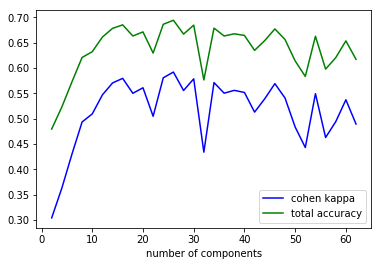

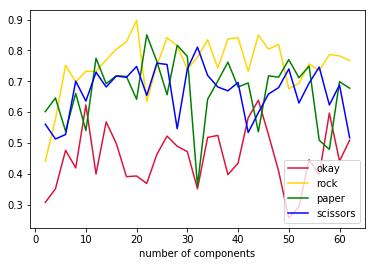

In [37]:
[param_range, cohen_kappas, accuracies, ok_score, rock_score, paper_score, scissors_score, fit_times, pred_times] = np.load('kmeans_results.npy')

plt.plot(param_range, cohen_kappas, label="cohen kappa", color='blue')
plt.plot(param_range, accuracies, label='total accuracy', color='green')
plt.xlabel('number of components')
plt.legend()
plt.show()

plt.plot(param_range, ok_score, label = 'okay', color="crimson")
plt.plot(param_range, rock_score, label = 'rock', color="gold")
plt.plot(param_range, paper_score, label = 'paper', color="green")
plt.plot(param_range, scissors_score, label = 'scissors', color="blue")
plt.xlabel('number of components')
plt.legend()
plt.show()

In [44]:
a = np.where(cohen_kappas == max(cohen_kappas))
#a = cohen_kappas.index(max(cohen_kappas))
print("max cohen kappa of {m:.4f} at {p} for motions".format(m=max(cohen_kappas), p=param_range[a]))

max cohen kappa of 0.5918 at [26.] for motions


In [30]:
em_test = GaussianMixture(n_components=11)
em_test.fit(X_train)
X_train_em_test = em_test.predict_proba(X_train)

In [33]:
print(X_train_em_test.shape)
print(X_train.shape)

(7473, 11)
(7473, 64)


In [34]:
param_range = range(2, 64)

em_results = []
for param in ['full', 'tied', 'diag', 'spherical']:
    em_model = GaussianMixture(n_components=11, covariance_type=param)
    em_fit = em_model.fit(X_train)
    X_train_gm = em_fit.predict_proba(X_train)
    X_val_gm = em_fit.predict_proba(X_val)
    em_nn_model_results = finalModel(X_train_gm, y_train, X_val_gm, y_val, learning_curves=False, verbose=True)
    em_nn_model_results['param'] = param
    em_results.append(em_nn_model_results)
    print('finished param {}'.format(param))

Fit time = 37.03540015220642
Pred time = 37.09780025482178
rock accuracy =   0.9847
paper accuracy =   0.9810
scissors accuracy =   0.9500
okay accuracy =   0.9605
Cohen Kappa: 0.9586202473806985
Accuracy: 0.9689673622257892
F1 Score: 0.9689835624088823
Precision: 0.9690718920264355
Recall: 0.9689673622257892


time elapsed: 37.378600120544434
finished param full


Fit time = 38.091400146484375
Pred time = 38.15380001068115
rock accuracy =   0.7495
paper accuracy =   0.3650
scissors accuracy =   0.3833
okay accuracy =   0.4583
Cohen Kappa: 0.31745175835939
Accuracy: 0.4868913857677903
F1 Score: 0.4858525222937411
Precision: 0.5170553765947136


Recall: 0.4868913857677903


time elapsed: 38.54580020904541
finished param tied


Fit time = 36.582600355148315
Pred time = 36.67620038986206
rock accuracy =   0.9826
paper accuracy =   0.9726


scissors accuracy =   0.9333
okay accuracy =   0.9408
Cohen Kappa: 0.9429240216119155
Accuracy: 0.9571963616907437
F1 Score: 0.9571635863028158
Precision: 0.9575035366494581
Recall: 0.9571963616907437


time elapsed: 37.175400257110596
finished param diag


Fit time = 39.28379988670349
Pred time = 39.36180019378662
rock accuracy =   0.5185
paper accuracy =   0.7827
scissors accuracy =   0.5979


okay accuracy =   0.0395
Cohen Kappa: 0.316194276611664
Accuracy: 0.48903156768325307
F1 Score: 0.5418748484853942
Precision: 0.6414366736504974
Recall: 0.48903156768325307


time elapsed: 39.73620009422302
finished param spherical


In [27]:
# unpack my sloppy mess
cohen_kappas = []
accuracies = []
ok_score = []
rock_score = []
paper_score = []
scissors_score = []
fit_times = []
pred_times = []

for result in em_results:
    cohen_kappas.append(result['cohen_kappa'])
    accuracies.append(result['accuracy'])
    ok_score.append(result['okay_accuracy'])
    rock_score.append(result['rock_accuracy'])
    paper_score.append(result['paper_accuracy'])
    scissors_score.append(result['scissors_accuracy'])
    fit_times.append(result['fit_time'])
    pred_times.append(result['pred_time'])

#np.save('em_results', [param_range, cohen_kappas, accuracies, ok_score, rock_score, paper_score, scissors_score, fit_times, pred_times])

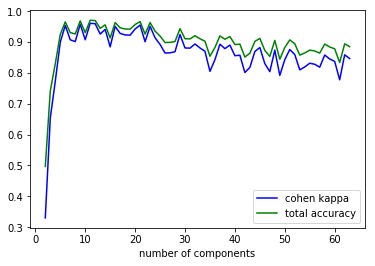

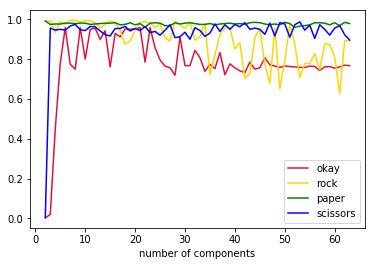

In [27]:


plt.plot(param_range, cohen_kappas, label="cohen kappa", color='blue')
plt.plot(param_range, accuracies, label='total accuracy', color='green')
plt.xlabel('number of components')
plt.legend()
plt.show()

plt.plot(param_range, ok_score, label = 'okay', color="crimson")
plt.plot(param_range, rock_score, label = 'rock', color="gold")
plt.plot(param_range, paper_score, label = 'paper', color="green")
plt.plot(param_range, scissors_score, label = 'scissors', color="blue")
plt.xlabel('number of components')
plt.legend()
plt.show()

In [77]:
a = cohen_kappas.index(max(cohen_kappas))
print("max cohen kappa of {m:.4f} at {p} for motions, EM".format(m=max(cohen_kappas), p=param_range[a]))

AttributeError: 'numpy.ndarray' object has no attribute 'index'

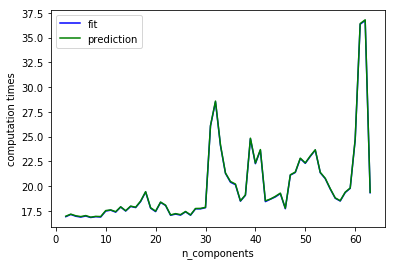

In [27]:
plt.plot(param_range, fit_times, label="fit", color='blue')
plt.plot(param_range, pred_times, label='prediction', color='green')
plt.xlabel('n_components')
plt.ylabel('computation times')
plt.legend()
plt.show()

In [ ]:
model_tsne = finalModel(X_tsne_km, y_train, X_tsne_km, y_train, learning_curves=False)

NameError: name 'X_tsne_km' is not defined

NameError: name 'pca_m_data' is not defined

In [79]:
#km_y = [pca_y_m, pca2_y_m, ica_y_m, rca_y_m, tsne_y_m, base_y_m]
#em_y = [pca_y2_m, pca2_y2_m, ica_y2_m, rca_y2_m, tsne_y2_m, base_y2_m]
#km_y_val = [pca_y_val_m, pca2_y_val_m, ica_y_val_m, rca_y_val_m, tsne_y_val_m, base_y_val_m]

em_y = [pca_y2_m, pca2_y2_m, ica_y2_m, rca_y2_m, tsne_y2_m, base_y2_m]
gm_y_val = [pca_y2_val_gm, pca2_y2_val_gm, ica_y2_val_gm, rca_y2_val_gm]

#km_y_fix = [a.reshape(7473, 1) for a in km_y]
em_y_fix = [a.reshape(7473, 1) for a in em_y]
#km_y_val_fix = [a.reshape(-1, 1) for a in km_y_val]
gm_y_val_fix = [a.reshape(-1, 1) for a in gm_y_val]

#[pca_y_m, pca2_y_m, ica_y_m, rca_y_m, tsne_y_m, base_y_m] = km_y_fix
[pca_y2_m, pca2_y2_m, ica_y2_m, rca_y2_m, tsne_y2_m, base_y2_m] = em_y_fix
#[pca_y_val_m, pca2_y_val_m, ica_y_val_m, rca_y_val_m, tsne_y_val_m, base_y_val_m] = km_y_val_fix
[pca_y_val_gm, pca2_y_val_gm, ica_y_val_gm, rca_y_val_gm] = gm_y_val_fix

X_pca_gm = np.concatenate((X_pca_m, pca_y2_m), axis=1)
X_pca2_gm = np.concatenate((X_pca2_m, pca2_y2_m), axis=1)
X_ica_gm = np.concatenate((X_ica_m, ica_y2_m), axis = 1)
X_rca_gm = np.concatenate((X_rca_m, rca_y2_m), axis = 1)
X_tsne_gm = np.concatenate((X_tsne_m, tsne_y2_m), axis = 1)

X_val_pca_gm = np.concatenate((X_val_pca_m, pca_y_val_gm), axis=1)
X_val_pca2_gm = np.concatenate((X_val_pca2_m, pca2_y_val_gm), axis=1)
X_val_ica_gm = np.concatenate((X_val_ica_m, ica_y_val_gm), axis = 1)
X_val_rca_gm = np.concatenate((X_val_rca_m, rca_y_val_gm), axis = 1)
#X_val_tsne_gm = np.concatenate((X_tsne_m, tsne_y_val_gm), axis = 1)

In [ ]:
X_train_list_gm = [X_pca_gm, X_pca2_gm, X_ica_gm, X_rca_gm]
X_val_list_gm = [X_val_pca_gm, X_val_pca2_gm, X_val_ica_gm, X_val_rca_gm]
name_list = ['pca-gm', 'pca2-gm', 'ica-gm', 'rca-gm']
model_results_gm=[]

i = 0
for X_train, X_val in zip(X_train_list_gm, X_val_list_gm):
    print("Running {}".format(name_list[i]))
    print("----------------------------------")
    model = finalModel(X_train, y_train, X_val, y_val, learning_curves=False, verbose=True)
    model_results_gm.append(model)
    i = i + 1
    print("----------------------------------")

Running pca-gm
----------------------------------


Cohen Kappa: 0.5414112205575308
time elapsed: 24.067400217056274
----------------------------------
Running pca2-gm
----------------------------------


KeyboardInterrupt: 

In [ ]:
scaler_tsne2 = StandardScaler()
X_tsne_gm_scaled = scaler_tsne2.fit_transform(X_tsne_gm)


tsne_model = finalModel(X_tsne_gm, y_train, X_tsne_gm, y_val, learning_curves=False)
tsne_model_scaled = finalModel(X_tsne_gm_scaled, y_train, X_tsne_gm_scaled, y_val, learning_curves=False)

NameError: name 'X_tsne_gm' is not defined

Fit time = 20.709800004959106
Pred time = 20.75659990310669
rock accuracy =   0.8824
paper accuracy =   0.8143
scissors accuracy =   0.7229
okay accuracy =   0.7368
Cohen Kappa: 0.7182351122662789
Accuracy: 0.7886570358480471
F1 Score: 0.7894864480365962
Precision: 0.7911094146005148
Recall: 0.7886570358480471


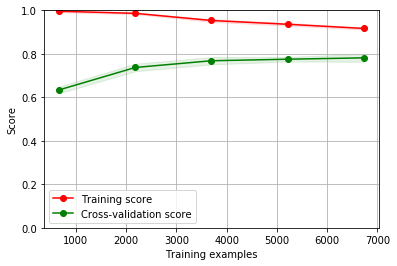

time elapsed: 827.1396040916443


In [6]:
#Truncated PCA
pca_model = finalModel(X_pca_m, y_train, X_val_pca_m, y_val, learning_curves=True)

Fit time = 22.297800302505493
Pred time = 22.323800325393677
rock accuracy =   0.9608
paper accuracy =   0.9451
scissors accuracy =   0.9021
okay accuracy =   0.9123
Cohen Kappa: 0.9065475031775658
Accuracy: 0.9299090422685928
F1 Score: 0.9298101928157596
Precision: 0.9300004542585112
Recall: 0.9299090422685928


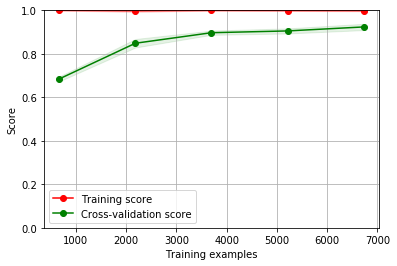

time elapsed: 777.7676043510437


In [7]:
clear_session() #clear the keras session - omg so important!!!!
# #Full PCA
pca2_model = finalModel(X_pca2_m, y_train, X_val_pca2_m, y_val, learning_curves=True)

Fit time = 22.505000352859497
Pred time = 22.55400013923645
rock accuracy =   0.9564
paper accuracy =   0.9451
scissors accuracy =   0.9062
okay accuracy =   0.8816
Cohen Kappa: 0.896545642571408
Accuracy: 0.922418405564473
F1 Score: 0.9224053730602458
Precision: 0.9224056521441175
Recall: 0.922418405564473


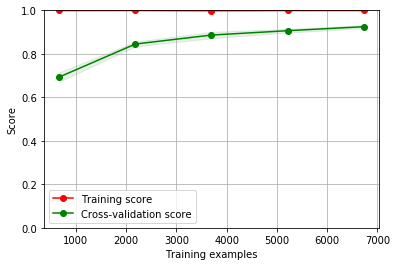

time elapsed: 937.7464048862457


In [9]:
clear_session() #clear the keras session - omg so important!!!!
#Base
base_model = finalModel(X_train, y_train, X_val, y_val, learning_curves=True)

Fit time = 22.701200246810913
Pred time = 22.75000023841858
rock accuracy =   0.9194
paper accuracy =   0.9451
scissors accuracy =   0.8771
okay accuracy =   0.8640
Cohen Kappa: 0.8687399807630651
Accuracy: 0.9015516318887106
F1 Score: 0.901369577081614
Precision: 0.9022480962694509
Recall: 0.9015516318887106


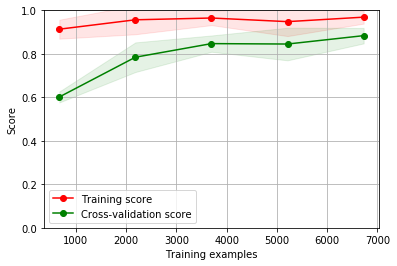

time elapsed: 904.345803976059


In [17]:
clear_session() #clear the keras session - omg so important!!!!
# ICA
ica_model = finalModel(X_ica_m, y_train, X_val_ica_m, y_val, learning_curves=True)

Fit time = 21.313600301742554
Pred time = 21.36240029335022
rock accuracy =   0.9150
paper accuracy =   0.8903
scissors accuracy =   0.8417
okay accuracy =   0.8421
Cohen Kappa: 0.8295087485873216
Accuracy: 0.8721241305510968
F1 Score: 0.8716247454844681
Precision: 0.8717783358626454
Recall: 0.8721241305510968


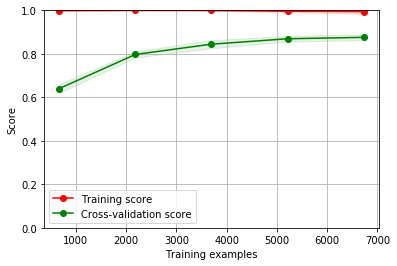

time elapsed: 953.9480037689209


In [17]:
clear_session() #clear the keras session - omg so important!!!!
# RCA
rca_model = finalModel(X_rca_m, y_train, X_val_rca_m, y_val, learning_curves=True)

In [84]:
clear_session() #clear the keras session - omg so important!!!!
# TSNE
tsne_model = finalModel(X_tsne_m, y_train, X_tsne_m, y_train, learning_curves=True)

Fit time = 22.22440004348755
Pred time = 22.318000078201294
rock accuracy =   0.6862
paper accuracy =   0.6233


scissors accuracy =   0.3369
okay accuracy =   0.7064
Cohen Kappa: 0.45163119197870516
Accuracy: 0.5889201124046568
F1 Score: 0.5914012724567983
Precision: 0.635441315895162
Recall: 0.5889201124046568


KeyboardInterrupt: 

In [17]:
print('yippie kai yai yay!')

yippie kai yai yay!


In [11]:
#Build the model
useLeakyReLU = True  # as an "advanced" activation function, it must be added as its own layer not as a parameter on another layer

if useLeakyReLU == False:
    def classification_model(n1=n1, n2=n2, n3 =n2, input_dim=64, mid_act = mid_act, num_layers = num_layers, optimizer = optimizer, activation = activation):
        model = Sequential()
        model.add(Dense(n1, input_dim=input_dim, activation=mid_act))
        model.add(Dense(n2, activation=mid_act))
        for i in range(num_layers-2):
            model.add(Dense(n3, activation=mid_act))
        model.add(Dense(4, activation=activation))
        model.compile(optimizer= optimizer,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        return model
else:
    def classification_model(n1=n1, n2=n2, n3 =n2, input_dim=64, mid_act = mid_act, num_layers = num_layers, optimizer = optimizer, activation = activation):
        model = Sequential()
        model.add(Dense(n1, input_dim=input_dim))
        model.add(LeakyReLU())
        model.add(Dense(n2))
        model.add(LeakyReLU())
        for i in range(num_layers-2):
            model.add(Dense(n3))
            model.add(LeakyReLU())
        model.add(Dense(4, activation=activation))
        model.compile(optimizer= optimizer,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        return model

#model = KerasClassifier(build_fn=classification_model, epochs=epo, batch_size=bat, verbose=0)

scorer = make_scorer(cohen_kappa_score)

In [12]:
# Final Model
#finalModel = True
def finalModel(X_train, y_train, X_test, y_test, learning_curves = True, 
               classification_model=classification_model, class_names=class_names,
               verbose=True):
    clear_session()
    model_results = defaultdict(float)
    ########## BEST FOUND PARAMETERS from HW1 #####
    n1 = 75
    n2 = 14
    mid_act = 'relu' #useleakyrelu is enabled...
    num_layers = 3
    optimizer = 'adam'
    activation = 'sigmoid' 
    epo = 100 #10
    bat = 44 #18
    ##############################################
    t0 = time.time()
    best_model = KerasClassifier(build_fn=classification_model, input_dim=X_train.shape[1], verbose=0)
    #model3 = KerasClassifier(build_fn=classification_model, optimizer='rmsprop', epochs=epo, batch_size=bat, verbose=0)
    
    t_fit = time.time()
    best_model.fit(X_train, y_train, batch_size=bat, epochs=epo)  #train on the whole training set
    if verbose:
        print("Fit time = {}".format(time.time()-t_fit))
    model_results['fit_time']=time.time()-t_fit
    t_pred = time.time()
    y_pred = best_model.predict(X_test)
    if verbose:
        print("Pred time = {}".format(time.time()-t_fit))
    model_results['pred_time']=time.time()-t_fit
    for motion_type in class_names:
        pred_score = best_model.score(X_test[y_test == motion_type], y_test[y_test == motion_type])
        if verbose:
            print("{} accuracy = {p:8.4f}".format(motion_type, p=pred_score))
        model_results[motion_type+'_accuracy']=pred_score
    
    print("Cohen Kappa: {}".format(cohen_kappa_score(y_pred, y_test)))  
    if verbose:
        print("Accuracy: {}".format(accuracy_score(y_pred, y_test)))
        print("F1 Score: {}".format(f1_score(y_pred, y_test, average='weighted')))
        print("Precision: {}".format(precision_score(y_pred, y_test, average='weighted')))
        print("Recall: {}".format(recall_score(y_pred, y_test, average='weighted')))
    
    model_results['cohen_kappa']=cohen_kappa_score(y_pred, y_test)
    model_results['accuracy']=accuracy_score(y_pred, y_test)
    model_results['f1']=f1_score(y_pred, y_test, average='weighted')
    model_results['precision']=f1_score(y_pred, y_test, average='weighted')
    model_results['recall']=recall_score(y_pred, y_test, average='weighted')
    
    model_results['y_test_pred']=y_pred
    model_results['y_train_pred']=best_model.predict(X_train)
    model_results['model']=best_model
    
    #learning_curves = True
    if learning_curves:
        clear_session()
        estimator = KerasClassifier(build_fn=classification_model, input_dim=X_train.shape[1], epochs=epo, batch_size=bat, verbose=0)
        #scorer = make_scorer(cohen_kappa_score)
        plot_learning_curves(estimator, X_train, y_train, title = "Neural Network - Motions Set - Post-Tuning Learning Curves", low_limit=0.0, ravel=False)
    
    print("time elapsed: {}".format(time.time()-t0))
    
    
    return model_results

In [ ]:
# References
# https://www.tensorflow.org/tutorials/keras/basic_classification
# https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/
# http://thedatascientist.com/performance-measures-cohens-kappa-statistic/
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py